In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [167]:
df = pd.read_excel(r"C:\Users\23PJ127\eff_models\LT Meter Data.xlsx")

In [168]:
data = df.sort_values(by = 'DATE', ignore_index=True)

In [169]:
fd = data
data=fd[['DATE', 'voltage_status']]

In [170]:
fd['date']=pd.to_datetime(fd['DATE'])


In [171]:
data=data.set_index(fd.date)
data=data.drop(['DATE'],axis=1)

In [172]:
data = data[data['voltage_status']!=0]

In [173]:
min=data.resample('T').last().ffill()
df=min
df.reset_index(inplace=True)

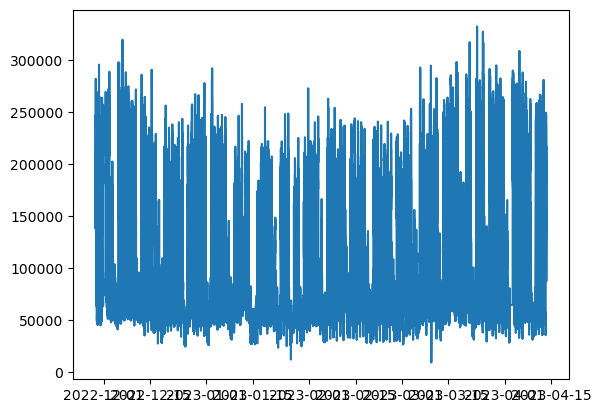

<Figure size 1200x1200 with 0 Axes>

In [174]:
plt.plot(df['date'],df['voltage_status'])
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.show()

In [175]:
# for period calculation 
mean = df['date'].mean()
std = str(df['date'].std())
print(std)
num = std.split(' ')
period = int(num[0])
#print(mean)

39 days 06:28:25.666681583


In [176]:
print(num)
print(type(period))

['39', 'days', '06:28:25.666681583']
<class 'int'>


In [177]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose

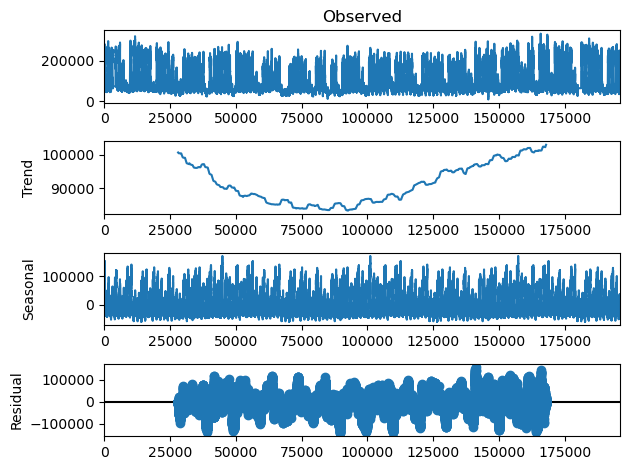

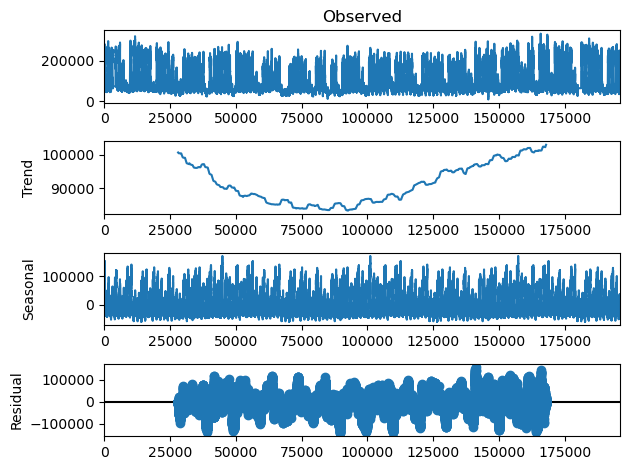

In [178]:

results = seasonal_decompose(df['voltage_status'].values,period=period*60*24)
results.plot()

In [179]:
df['trend'] = results.trend
df['seasonal'] = results.seasonal

In [180]:
df['trend'] = df['trend'].fillna(df['trend'].mean())

In [181]:
df['trend'].isna().sum()

0

In [182]:
# sampling the time periods through dates 

df['dates_n'] = pd.to_datetime(df['date']).dt.date
print(df['dates_n'])
unique_d = df['dates_n']
print(len(df['dates_n'].unique()))

0         2022-11-28
1         2022-11-28
2         2022-11-28
3         2022-11-28
4         2022-11-28
             ...    
195884    2023-04-13
195885    2023-04-13
195886    2023-04-13
195887    2023-04-13
195888    2023-04-13
Name: dates_n, Length: 195889, dtype: object
137


In [183]:


df['times'] = pd.to_datetime(df['date']).dt.time

print(len(df['times'].unique()))

1440


In [184]:
daY_1 = df[df['dates_n'] == unique_d[2116]]

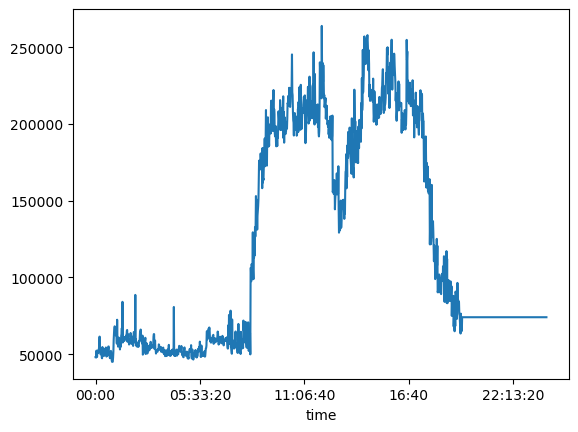

In [185]:
plt.plot(daY_1['times'],daY_1['voltage_status'])

In [186]:
unique_dates = df['dates_n'].unique()
print(unique_dates)

[datetime.date(2022, 11, 28) datetime.date(2022, 11, 29)
 datetime.date(2022, 11, 30) datetime.date(2022, 12, 1)
 datetime.date(2022, 12, 2) datetime.date(2022, 12, 3)
 datetime.date(2022, 12, 4) datetime.date(2022, 12, 5)
 datetime.date(2022, 12, 6) datetime.date(2022, 12, 7)
 datetime.date(2022, 12, 8) datetime.date(2022, 12, 9)
 datetime.date(2022, 12, 10) datetime.date(2022, 12, 11)
 datetime.date(2022, 12, 12) datetime.date(2022, 12, 13)
 datetime.date(2022, 12, 14) datetime.date(2022, 12, 15)
 datetime.date(2022, 12, 16) datetime.date(2022, 12, 17)
 datetime.date(2022, 12, 18) datetime.date(2022, 12, 19)
 datetime.date(2022, 12, 20) datetime.date(2022, 12, 21)
 datetime.date(2022, 12, 22) datetime.date(2022, 12, 23)
 datetime.date(2022, 12, 24) datetime.date(2022, 12, 25)
 datetime.date(2022, 12, 26) datetime.date(2022, 12, 27)
 datetime.date(2022, 12, 28) datetime.date(2022, 12, 29)
 datetime.date(2022, 12, 30) datetime.date(2022, 12, 31)
 datetime.date(2023, 1, 1) datetime.date

In [187]:
# splitting parameter for the data 
div = int(len(unique_dates)*0.2)
print(div)

27


In [188]:
u_d = unique_dates[:-div]

In [189]:
print(u_d)

[datetime.date(2022, 11, 28) datetime.date(2022, 11, 29)
 datetime.date(2022, 11, 30) datetime.date(2022, 12, 1)
 datetime.date(2022, 12, 2) datetime.date(2022, 12, 3)
 datetime.date(2022, 12, 4) datetime.date(2022, 12, 5)
 datetime.date(2022, 12, 6) datetime.date(2022, 12, 7)
 datetime.date(2022, 12, 8) datetime.date(2022, 12, 9)
 datetime.date(2022, 12, 10) datetime.date(2022, 12, 11)
 datetime.date(2022, 12, 12) datetime.date(2022, 12, 13)
 datetime.date(2022, 12, 14) datetime.date(2022, 12, 15)
 datetime.date(2022, 12, 16) datetime.date(2022, 12, 17)
 datetime.date(2022, 12, 18) datetime.date(2022, 12, 19)
 datetime.date(2022, 12, 20) datetime.date(2022, 12, 21)
 datetime.date(2022, 12, 22) datetime.date(2022, 12, 23)
 datetime.date(2022, 12, 24) datetime.date(2022, 12, 25)
 datetime.date(2022, 12, 26) datetime.date(2022, 12, 27)
 datetime.date(2022, 12, 28) datetime.date(2022, 12, 29)
 datetime.date(2022, 12, 30) datetime.date(2022, 12, 31)
 datetime.date(2023, 1, 1) datetime.date

In [190]:


df['train'] = df['dates_n'].apply(lambda x: 1 if x in u_d else 0)

In [191]:
# creating new dataframe for manipulating the data for train-test split 
dfx = df.drop(['dates_n','times'],axis = 1)


In [192]:
df = df.drop_duplicates()

In [193]:
df['trend'].isna().sum()

0

In [194]:
df

,date,voltage_status,trend,seasonal,dates_n,times,train
0,2022-11-28 12:45:00,166630.0,91225.88238,21910.636769,2022-11-28,12:45:00,1
1,2022-11-28 12:46:00,167020.0,91225.88238,7305.660852,2022-11-28,12:46:00,1
2,2022-11-28 12:47:00,183090.0,91225.88238,8260.667306,2022-11-28,12:47:00,1
3,2022-11-28 12:48:00,181220.0,91225.88238,8040.656934,2022-11-28,12:48:00,1
4,2022-11-28 12:49:00,176710.0,91225.88238,3385.694951,2022-11-28,12:49:00,1
...,...,...,...,...,...,...,...
195884,2023-04-13 13:29:00,121820.0,91225.88238,-21387.441267,2023-04-13,13:29:00,0
195885,2023-04-13 13:30:00,131650.0,91225.88238,-19477.534082,2023-04-13,13:30:00,0
195886,2023-04-13 13:31:00,137720.0,91225.88238,-22877.565956,2023-04-13,13:31:00,0
195887,2023-04-13 13:32:00,135860.0,91225.88238,-20697.580423,2023-04-13,13:32:00,0


In [195]:
y = df["date"]
x = df.drop(["date","dates_n","times","train"],axis = 1)

0        2022-01-12 12:39:00
1        2022-01-12 12:40:00
2        2022-01-12 12:41:00
3        2022-01-12 12:42:00
4        2022-01-12 12:43:00
                 ...        
995716   2023-12-04 23:55:00
995717   2023-12-04 23:56:00
995718   2023-12-04 23:57:00
995719   2023-12-04 23:58:00
995720   2023-12-04 23:59:00
Name: date, Length: 995721, dtype: datetime64[ns]


In [147]:
df_new = df.drop(["date","dates_n","times","train"],axis=1)

In [131]:
# train = df[df['train']==1]

In [132]:
# test = df[df['train']==0]

In [134]:
# df_new =pd.concat([train, test], axis=0)

In [138]:
y = df_new['voltage_status']
x = df_new.drop('voltage_status',axis = 1)

In [62]:
# test.isna().sum()

date              0
voltage_status    0
trend             0
seasonal          0
dates_n           0
times             0
train             0
dtype: int64

In [63]:
# train.isna().sum()

date              0
voltage_status    0
trend             0
seasonal          0
dates_n           0
times             0
train             0
dtype: int64

In [64]:
# train = train.set_index('date').drop(['dates_n','times','train'],axis = 1)

In [65]:
# test=test.set_index('date').drop(['dates_n','times','train'],axis = 1)

In [66]:
# #
# def up(sample,n,results):
#     sequence_length = 1440
#     new_x = []
#     new_y = []
#     for i in range(n-sequence_length):
#         new_x.append(np.concatenate([sample[i:i+sequence_length],results[i:i+sequence_length]]))
#         new_y.append(sample[i+sequene_length])
        
# train_x,train_y = up(train,len(train),results)
# test_x,test_y = up(test,len(test),results)
        

In [149]:
df_new

array([[0.51600025, 0.45176335, 0.19085094],
       [0.58928571, 0.45176335, 0.20733105],
       [0.52287076, 0.45176335, 0.18548538],
       ...,
       [0.11828423, 0.45176335, 0.04110132],
       [0.1178819 , 0.45176335, 0.04110142],
       [0.11763432, 0.45176335, 0.04110153]])

In [198]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [199]:
print(np.shape(x_train))
print(np.shape(y_train))

(137122, 3)
(137122,)


In [206]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [207]:
print(y)
     

0        2022-11-28 12:45:00
1        2022-11-28 12:46:00
2        2022-11-28 12:47:00
3        2022-11-28 12:48:00
4        2022-11-28 12:49:00
                 ...        
195884   2023-04-13 13:29:00
195885   2023-04-13 13:30:00
195886   2023-04-13 13:31:00
195887   2023-04-13 13:32:00
195888   2023-04-13 13:33:00
Name: date, Length: 195889, dtype: datetime64[ns]


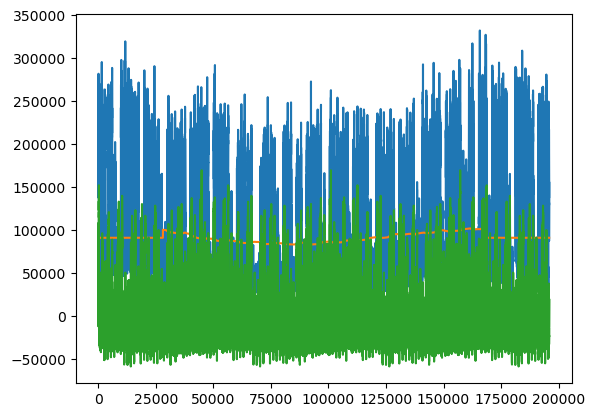

In [208]:
# plt.plot(train)
plt.plot(x)

In [71]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [72]:
train

,voltage_status,trend,seasonal
date,,,
2022-01-12 12:39:00,176070.0,68093.536560,10295.219008
2022-01-12 12:40:00,199750.0,68093.536560,13735.223929
2022-01-12 12:41:00,178290.0,68093.536560,9175.228849
2022-01-12 12:42:00,183130.0,68093.536560,6705.233770
2022-01-12 12:43:00,198890.0,68093.536560,9430.238690
...,...,...,...
2023-07-19 23:55:00,50530.0,64367.352265,-9438.128813
2023-07-19 23:56:00,50530.0,64367.396409,-8831.443802
2023-07-19 23:57:00,50530.0,64367.440553,-8848.092125


In [73]:
# # define generator
# n_input = 1440
# n_features = 3
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=20)

In [209]:

from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf


In [271]:

# define model
model_gru1 = Sequential()
model_gru1.add(LSTM(100, activation='relu', input_shape=[None,1]))

# model.add(LSTM(32,activation='relu'))
model_gru1.add(Dense(1))
model_gru1.compile(optimizer='adam', loss = 'mse',metrics = ['accuracy'])

In [211]:
from timeit import default_timer as timer
start = timer()
# fit model

history = model.fit(x_train,y_train,epochs=12)
end = timer()
print('time taken for training '+str(end-start))

Epoch 1/12
4286/4286 [==============================] - 21s 5ms/step - loss: 0.0785 - accuracy: 7.2928e-06
Epoch 2/12
4286/4286 [==============================] - 21s 5ms/step - loss: 0.0752 - accuracy: 7.2928e-06
Epoch 3/12
4286/4286 [==============================] - 22s 5ms/step - loss: 0.0743 - accuracy: 7.2928e-06
Epoch 4/12
4286/4286 [==============================] - 27s 6ms/step - loss: 0.0738 - accuracy: 7.2928e-06
Epoch 5/12
4286/4286 [==============================] - 25s 6ms/step - loss: 0.0731 - accuracy: 7.2928e-06
Epoch 6/12
4286/4286 [==============================] - 27s 6ms/step - loss: 0.0722 - accuracy: 7.2928e-06
Epoch 7/12
4286/4286 [==============================] - 23s 5ms/step - loss: 0.0717 - accuracy: 7.2928e-06
Epoch 8/12
4286/4286 [==============================] - 21s 5ms/step - loss: 0.0712 - accuracy: 7.2928e-06
Epoch 9/12
4286/4286 [==============================] - 22s 5ms/step - loss: 0.0710 - accuracy: 7.2928e-06
Epoch 10/12
4286/4286 [==============

In [213]:
model_gru = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16, return_sequences=True)),
  tf.keras.layers.Dense(1,activation='sigmoid')])

In [214]:

model_gru.compile(optimizer = 'adam',loss = tf.keras.losses.Huber(),metrics = ['accuracy'])
history = model_gru.fit(x_train,y_train,epochs = 25)

Epoch 1/25
4286/4286 [==============================] - 18s 3ms/step - loss: 0.0377 - accuracy: 7.2928e-06
Epoch 2/25
4286/4286 [==============================] - 14s 3ms/step - loss: 0.0369 - accuracy: 7.2928e-06
Epoch 3/25
4286/4286 [==============================] - 15s 4ms/step - loss: 0.0354 - accuracy: 7.2928e-06
Epoch 4/25
4286/4286 [==============================] - 16s 4ms/step - loss: 0.0348 - accuracy: 7.2928e-06
Epoch 5/25
4286/4286 [==============================] - 16s 4ms/step - loss: 0.0345 - accuracy: 7.2928e-06
Epoch 6/25
4286/4286 [==============================] - 15s 4ms/step - loss: 0.0341 - accuracy: 7.2928e-06
Epoch 7/25
4286/4286 [==============================] - 15s 4ms/step - loss: 0.0338 - accuracy: 7.2928e-06
Epoch 8/25
4286/4286 [==============================] - 15s 4ms/step - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 9/25
4286/4286 [==============================] - 15s 4ms/step - loss: 0.0332 - accuracy: 7.2928e-06
Epoch 10/25
4286/4286 [==============

C:\Users\23PJ127\AppData\Local\Temp\ipykernel_3736\7405913.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


<Figure size 2000x400 with 0 Axes>

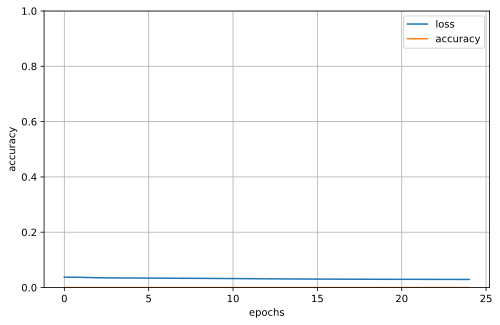

In [215]:
import matplotlib.pyplot as plt        
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [115]:
generator = TimeseriesGenerator(scaled_test,scaled_test,length = n_input,batch_size = 2)
pred = model.predict(generator)

99359/99359 [==============================] - 81s 818us/step


In [79]:
print(np.shape(scaled_test))

(198720, 3)


In [80]:
test

,voltage_status,trend,seasonal
date,,,
2023-07-20 00:00:00,50530.0,64367.572986,-10184.703759
2023-07-20 00:01:00,50530.0,64367.617131,-10724.685415
2023-07-20 00:02:00,50530.0,64367.661275,-11968.000405
2023-07-20 00:03:00,50530.0,64367.705419,-11911.315394
2023-07-20 00:04:00,50530.0,64367.749564,-11327.963717
...,...,...,...
2023-12-04 23:55:00,49850.0,68093.536560,-20963.085256
2023-12-04 23:56:00,47790.0,68093.536560,-20963.064283
2023-12-04 23:57:00,47560.0,68093.536560,-20963.043310


In [81]:
print(np.shape(pred))
print(pred)

(198718, 1)
[[0.14731629]
 [0.14570306]
 [0.14520732]
 ...
 [0.18726458]
 [0.18646622]
 [0.18629485]]


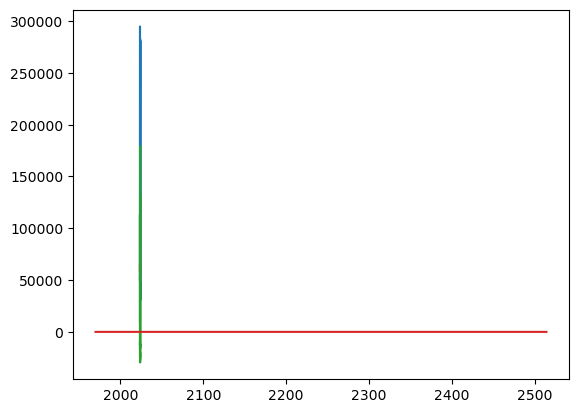

In [122]:
# pred = scaler.inverse_transform(pred)

plt.plot(test)
# plt.plot(train)
plt.plot(pred)
# plt.plot(test)
# plt.plot(train)
# plt.plot(pred)

In [83]:
print(type(pred))
pred = pred.reshape(-1,1)

<class 'numpy.ndarray'>


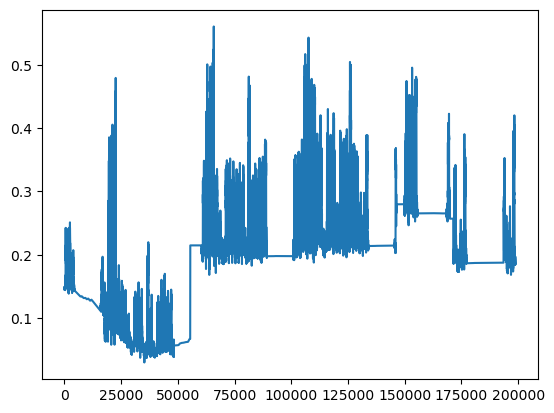

In [114]:
plt.plot(pred)

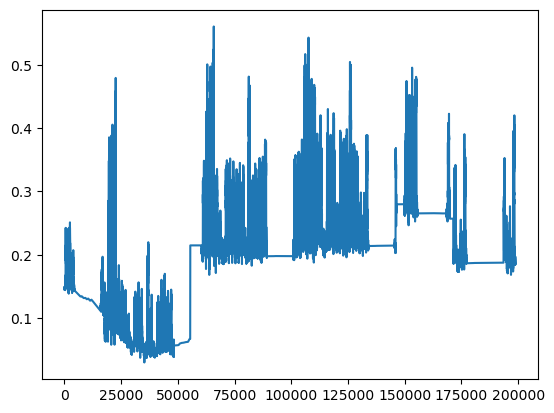

In [84]:
plt.plot(pred)
re = seasonal_decompose(pred,period=1440)

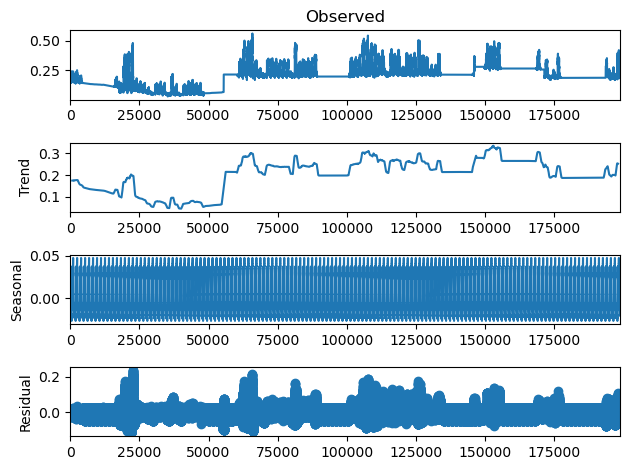

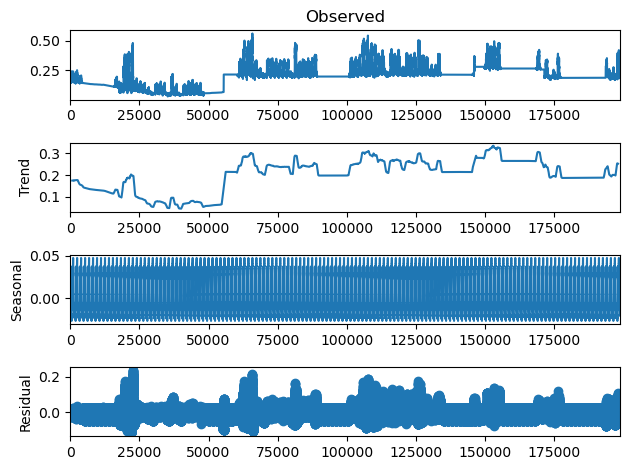

In [85]:
re.plot()

In [86]:
print(pred.reshape(1,-1))

[[0.14731629 0.14570306 0.14520732 ... 0.18726458 0.18646622 0.18629485]]


In [87]:
print(np.shape(pred))

(198718, 1)


In [88]:
pred = pred.flatten()

In [89]:
df_pred = pd.DataFrame({'pred':pred,'trend':re.trend,'seasonal':re.seasonal})

In [90]:
df_pred['trend'] = df_pred['trend'].fillna(df_pred['trend'].mean())


In [91]:
df_pred['trend'].isna().sum()

0

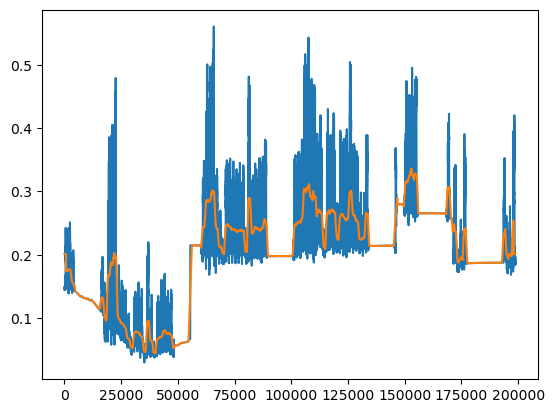

In [113]:

plt.plot(df_pred.drop("seasonal",axis = 1))
# plt.plot(test)
# plt.plot(pred)


In [93]:
df_pred

,pred,trend,seasonal
0,0.147316,0.201221,-0.020846
1,0.145703,0.201221,-0.021088
2,0.145207,0.201221,-0.021155
3,0.145875,0.201221,-0.020593
4,0.146245,0.201221,-0.020776
...,...,...,...
198713,0.189022,0.201221,-0.019916
198714,0.188985,0.201221,-0.020038
198715,0.187265,0.201221,-0.020033
198716,0.186466,0.201221,-0.020241


In [94]:
df_pred.columns = ['voltage_status','trend','seasonal']

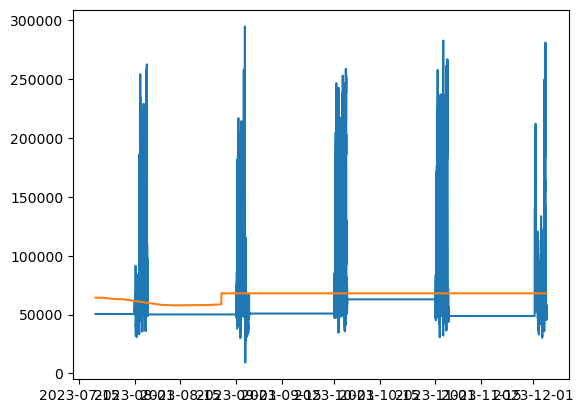

In [111]:
plt.plot(test.drop('seasonal',axis = 1))

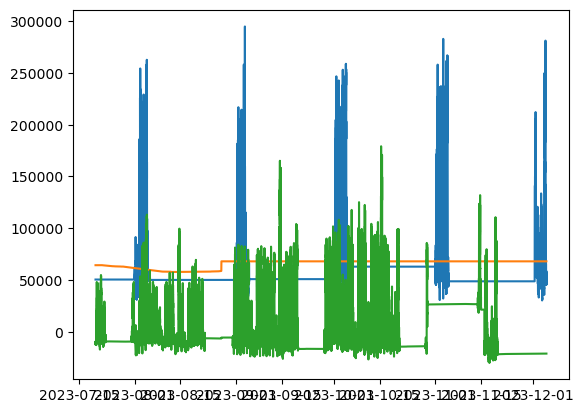

In [109]:
pr

                     voltage_status         trend      seasonal
date                                                           
2023-07-20 00:00:00         50530.0  64367.572986 -10184.703759
2023-07-20 00:01:00         50530.0  64367.617131 -10724.685415
2023-07-20 00:02:00         50530.0  64367.661275 -11968.000405
2023-07-20 00:03:00         50530.0  64367.705419 -11911.315394
2023-07-20 00:04:00         50530.0  64367.749564 -11327.963717
...                             ...           ...           ...
2023-12-04 23:55:00         49850.0  68093.536560 -20963.085256
2023-12-04 23:56:00         47790.0  68093.536560 -20963.064283
2023-12-04 23:57:00         47560.0  68093.536560 -20963.043310
2023-12-04 23:58:00         47430.0  68093.536560 -20963.022337
2023-12-04 23:59:00         47350.0  68093.536560 -20963.001364

[198720 rows x 3 columns]


In [96]:
from datetime import date
# def scaler(num):
#     num = MinMaxScaler().fit_transform(num)
#     return num 

def forecast(num_prediction,model):
    #
    
    forecast_list = df_pred[-1440:]
    # print(forecast_list)
    # print(len(forecast_list))
    x = forecast_list[-1440:]
    x = scaler.transform(x)
    print(x)
    # x = x.reshape(1,11)
    pred2 = TimeseriesGenerator(x,x,length =1,batch_size = 1)
#TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=20)
    # print(pred2)
    #print(x)
    print("forecast list length",len(forecast_list))
    look_back = 1440*2
    for _ in range(num_prediction):
        x = forecast_list[-look_back:]
#         x = x.reshape((1, look_back, 1))
        print("the forecast shape is",np.shape(forecast_list))
        #
        out = model.predict(pred2)
        print(out)
        forecast_list = np.append(forecast_list, out)
    forecast_list = forecast_list[-look_back:] 
    return forecast_list 

def predict_dates(num_prediction):
    # last_date = df['dates_n'].values[-1]
    last_date = date.today()
    predictions_dates = pd.date_range(last_date,periods = 1440*2,freq = 'Min').tolist()
    return predictions_dates  

num_prediction = 1
forecast = forecast(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

[[-0.0379962  -2.78729614  0.14152932]
 [-0.03799622 -2.78729614  0.14152932]
 [-0.03799622 -2.78729613  0.14152932]
 ...
 [-0.03799623 -2.78729685  0.14152932]
 [-0.03799623 -2.78729685  0.14152932]
 [-0.03799623 -2.78729685  0.14152933]]
forecast list length 1440
the forecast shape is (1440, 3)
1439/1439 [==============================] - 1s 724us/step
[[-5.6160393]
 [-5.6160393]
 [-5.6160393]
 ...
 [-5.616041 ]
 [-5.616041 ]
 [-5.616041 ]]


In [97]:
# print(len(forecast))
# forecast_dates = np.array(forecast_dates).reshape(-1,1)
# # print(np.shape(forecast_dates))

In [98]:
print(np.shape(forecast))

(2880,)


In [99]:
rec = seasonal_decompose(forecast,period = 1440)
trend = rec.trend

fore = pd.DataFrame({'forecast':forecast,'trend':trend,'seasonal':rec.seasonal})
fore['trend'] = fore['trend'].fillna(fore['trend'].mean())


In [100]:
print(len(fore))

2880


In [101]:
print(type(forecast))
# forecast = forecast.reshape(-1,3)
true_predictions = scaler.inverse_transform(fore)
true_predictions = true_predictions
print(len(true_predictions))
# print(np.shape(forecast_dates))
# print(np.shape(true_predictions))

<class 'numpy.ndarray'>
2880


In [102]:
fore['date'] = forecast_dates

In [103]:
print(forecast)

[ 0.03534527  0.37906086  0.20122139 ... -5.61604118 -5.61604118
 -5.61604118]


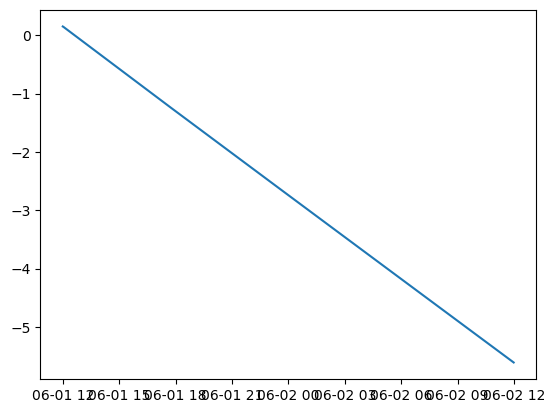

In [104]:
plt.plot(forecast_dates,
         trend)

[]

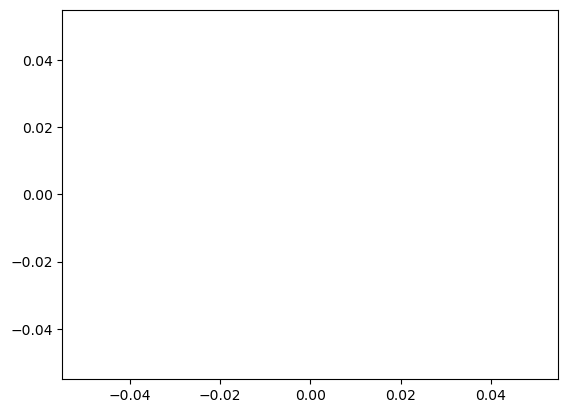

In [105]:
plt.plot()

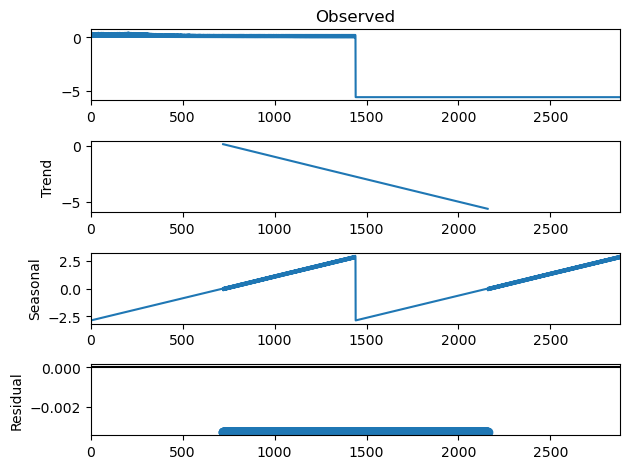

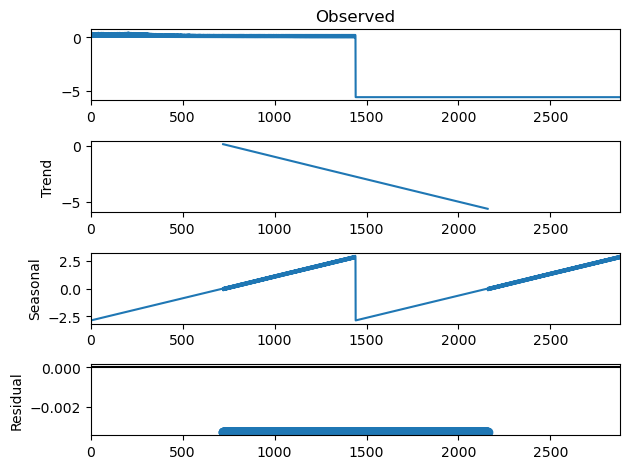

In [106]:
rec.plot()

In [107]:
true_prediction = true_predictions.flatten() 
total = trend + rec.seasonal  + true_prediction + rec.resid
plt.plot(total)

ValueError: operands could not be broadcast together with shapes (2880,) (8640,) 

In [ ]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Generate some sample data
# # Replace this with your own minute-to-minute data
# data = np.random.rand(1000)

# # Perform seasonal decomposition
# result = seasonal_decompose(data, model='additive', period=1440)  # Assuming daily seasonality

# # Get the seasonal component
# seasonal_component = result.seasonal

# # Prepare the data for LSTM model
# # Split the data into input (X) and output (y) sequences
# sequence_length = 10
# X = []
# y = []
# for i in range(len(data) - sequence_length):
#     X.append(np.concatenate([data[i:i+sequence_length], seasonal_component[i:i+sequence_length]]))
#     y.append(data[i+sequence_length])

# # Convert the data to numpy arrays
# X = np.array(X)
# y = np.array(y)

# # Reshape the input data to fit LSTM model requirements
# X = X.reshape(X.shape[0], X.shape[1], 1)

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(2 * sequence_length, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# # Train the LSTM model
# model.fit(X, y, epochs=100, batch_size=16)

# # Make predictions with the trained model
# # Replace `test_data` with your own minute-to-minute data for prediction
# test_data = np.random.rand(10)
# test_seasonal_component = seasonal_decompose(test_data, model='additive', period=1440).seasonal
# test_input = np.concatenate([test_data, test_seasonal_component])
# test_input = test_input.reshape(1, 2 * sequence_length, 1)
# predicted_value = model.predict(test_input)

# # Print the predicted value
# print("Predicted Value:", predicted_value)


In [ ]:
# print(pred[-1445:])

In [217]:
from datetime import date
print(type(date.today()))

<class 'datetime.date'>


In [224]:
scaler.fit(y_test)
y_t = scaler.fit(y_test).inverse_transform(y_test)

array([[3.96712357e-02],
       [7.50098272e-01],
       [2.82180871e-01],
       ...,
       [8.53679455e-01],
       [4.44138142e-04],
       [8.53368048e-01]])

[[3.96712357e-02]
 [7.50098272e-01]
 [2.82180871e-01]
 ...
 [8.53679455e-01]
 [4.44138142e-04]
 [8.53368048e-01]]


In [227]:
data = pd.read_excel(r"C:\Users\23PJ127\eff_models\LT Meter Data.xlsx")

In [228]:
print(data)

                      DATE       LTIME  voltage_status
0      2022-11-28 12:45:53  1833238643          166630
1      2022-11-28 12:46:19  1833240305          166630
2      2022-11-28 12:46:53  1833242485          167020
3      2022-11-28 12:47:53  1833246327          183090
4      2022-11-28 12:48:53  1833250170          181220
...                    ...         ...             ...
192969 2023-04-13 13:29:36   567128068          121820
192970 2023-04-13 13:30:36   567131910          131650
192971 2023-04-13 13:31:36   567135752          137720
192972 2023-04-13 13:32:36   567139594          135860
192973 2023-04-13 13:33:36   567143436          130890

[192974 rows x 3 columns]


<Axes: >

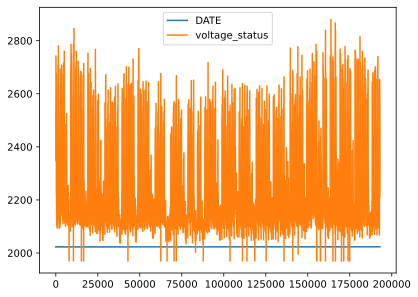

In [232]:
data.drop("LTIME",axis = 1).plot()

In [236]:
from sklearn.preprocessing import MinMaxScaler 
p_l = MinMaxScaler().fit_transform(np.array(data["LTIME"]).reshape(-1,1))

In [238]:
data["new_ltimes"] = p_l

<Axes: >

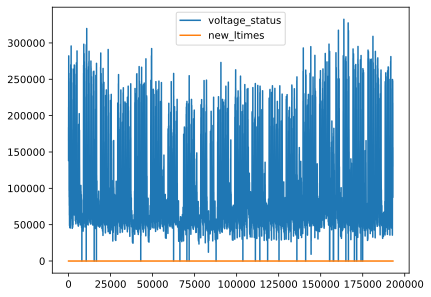

In [240]:
data.drop(["LTIME","DATE"],axis = 1).plot()

In [294]:
df = data.drop(["LTIME","DATE"],axis = 1)

In [304]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(df["new_ltimes"],df["voltage_status"],test_size = 0.3)

In [305]:

from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf


In [311]:
model_gru1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[1440,1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True)),
  tf.keras.layers.Dense(1,activation='sigmoid')])

In [312]:

model_gru1.compile(optimizer = 'adam',loss="mse",metrics = ['accuracy'])
history = model_gru1.fit(x_train,y_train,epochs = 25)

Epoch 1/25
4222/4222 [==============================] - 12s 2ms/step - loss: 12264990720.0000 - accuracy: 0.0000e+00
Epoch 2/25
4222/4222 [==============================] - 9s 2ms/step - loss: 12264977408.0000 - accuracy: 0.0000e+00
Epoch 3/25
4222/4222 [==============================] - 9s 2ms/step - loss: 12264998912.0000 - accuracy: 0.0000e+00
Epoch 4/25
4222/4222 [==============================] - 9s 2ms/step - loss: 12264981504.0000 - accuracy: 0.0000e+00
Epoch 5/25
4222/4222 [==============================] - 9s 2ms/step - loss: 12264973312.0000 - accuracy: 0.0000e+00
Epoch 6/25
4222/4222 [==============================] - 10s 2ms/step - loss: 12264995840.0000 - accuracy: 0.0000e+00
Epoch 7/25
4222/4222 [==============================] - 10s 2ms/step - loss: 12265001984.0000 - accuracy: 0.0000e+00
Epoch 8/25
4222/4222 [==============================] - 10s 2ms/step - loss: 12264995840.0000 - accuracy: 0.0000e+00
Epoch 9/25
4222/4222 [==============================] - 11s 3ms/step

        voltage_status  new_ltimes
113546          169610    0.127128
112195          110820    0.124560
54905           146150    0.014979
93231           188580    0.088962
77754            53140    0.059571
...                ...         ...
148847           70490    0.194504
124460           80710    0.147629
173441           60710    0.241879
42046           196060    0.990796
11886           196720    0.932626

[135081 rows x 2 columns]


Epoch 1/25
4222/4222 [==============================] - 7s 1ms/step - loss: 71068.6094 - accuracy: 0.0000e+00
Epoch 2/25
4222/4222 [==============================] - 5s 1ms/step - loss: 16.3063 - accuracy: 0.0000e+00
Epoch 3/25
4222/4222 [==============================] - 6s 2ms/step - loss: 197.2055 - accuracy: 0.0000e+00
Epoch 4/25
4222/4222 [==============================] - 5s 1ms/step - loss: 119.0297 - accuracy: 0.0000e+00
Epoch 5/25
4222/4222 [==============================] - 7s 2ms/step - loss: 166.9079 - accuracy: 0.0000e+00
Epoch 6/25
4222/4222 [==============================] - 9s 2ms/step - loss: 71.5863 - accuracy: 0.0000e+00
Epoch 7/25
4222/4222 [==============================] - 8s 2ms/step - loss: 95.2362 - accuracy: 7.4030e-06
Epoch 8/25
4222/4222 [==============================] - 6s 1ms/step - loss: 118.8698 - accuracy: 0.0000e+00
Epoch 9/25
4222/4222 [==============================] - 6s 1ms/step - loss: 89.9681 - accuracy: 0.0000e+00
Epoch 10/25
4222/4222 [=======

C:\Users\23PJ127\AppData\Local\Temp\ipykernel_3736\4194037992.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


<Figure size 2000x400 with 0 Axes>

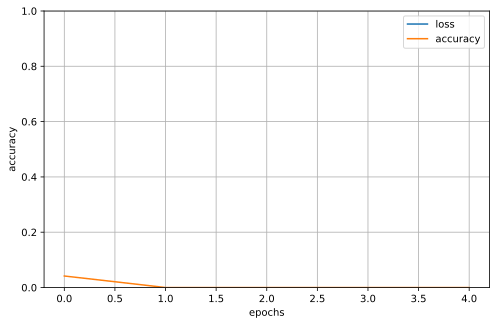

In [325]:
import matplotlib.pyplot as plt        
from matplotlib.pyplot import figure
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
pd.DataFrame(history1.history).plot(figsize = (8,5))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [252]:
scaled_train = pd.concat([x_train,y_train],axis = 1)

In [345]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=[n_input,1],return_sequences = True))
model.add(LSTM(64,activation='relu',return_sequences = True))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse',metrics = ['accuracy'])

In [347]:

# model.compile(optimizer = 'adam',loss="mse",metrics = ['accuracy'])
history1 = model.fit(generator,steps_per_epoch = len(generator),epochs = 5)

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/mean_squared_error/Prod' defined at (most recent call last):
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\ProgramData\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\ProgramData\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\23PJ127\AppData\Local\Temp\ipykernel_3736\1463451852.py", line 2, in <module>
      history1 = model.fit(generator,epochs = 5)
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer.py", line 542, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\Users\23PJ127\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer.py", line 275, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/mean_squared_error/Prod'
Number of elements was larger than representable by 32-bit output type
	 [[{{node gradient_tape/mean_squared_error/Prod}}]] [Op:__inference_train_function_6489699]

In [ ]:


from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 1440 
generator = TimeseriesGenerator(df["new_ltimes"],df["voltage_status"],length = n_input,batch_size = 1440)


In [341]:

for i in range(len(generator)):
 x, y = generator[i]
 print('%s => %s' % (x, y))
 print(len(y))

[[0.90830648 0.90830731 0.90830839 ... 0.91099428 0.91099618 0.91099809]
 [0.90830731 0.90830839 0.90831029 ... 0.91099618 0.91099809 0.91099999]
 [0.90830839 0.90831029 0.90831219 ... 0.91099809 0.91099999 0.91100189]
 ...
 [0.91099428 0.91099618 0.91099809 ... 0.91368779 0.91368969 0.9136916 ]
 [0.91099618 0.91099809 0.91099999 ... 0.91368969 0.9136916  0.9136935 ]
 [0.91099809 0.91099999 0.91100189 ... 0.9136916  0.9136935  0.9136954 ]] => [194340 195050 192380 ... 234610 227870 228750]
1440
[[0.91099999 0.91100189 0.9110038  ... 0.9136935  0.9136954  0.91369731]
 [0.91100189 0.9110038  0.9110057  ... 0.9136954  0.91369731 0.91369921]
 [0.9110038  0.9110057  0.9110076  ... 0.91369731 0.91369921 0.91370111]
 ...
 [0.9136935  0.9136954  0.91369731 ... 0.91839334 0.91839524 0.91839715]
 [0.9136954  0.91369731 0.91369921 ... 0.91839524 0.91839715 0.91839905]
 [0.91369731 0.91369921 0.91370111 ... 0.91839715 0.91839905 0.91840095]] => [226650 216680 263860 ...  68070  65110  61360]
1440


[[0.96183212 0.96183402 0.96183593 ... 0.96452563 0.96452753 0.96452944]
 [0.96183402 0.96183593 0.96183783 ... 0.96452753 0.96452944 0.96453134]
 [0.96183593 0.96183783 0.96183973 ... 0.96452944 0.96453134 0.96453307]
 ...
 [0.96452563 0.96452753 0.96452944 ... 0.96723437 0.96723627 0.96723817]
 [0.96452753 0.96452944 0.96453134 ... 0.96723627 0.96723817 0.96724008]
 [0.96452944 0.96453134 0.96453307 ... 0.96723817 0.96724008 0.96724198]] => [61170 61170 56430 ... 60370 75490 64450]
1440
[[0.96453134 0.96453307 0.96453325 ... 0.96724008 0.96724198 0.96724388]
 [0.96453307 0.96453325 0.96453515 ... 0.96724198 0.96724388 0.96724579]
 [0.96453325 0.96453515 0.96453705 ... 0.96724388 0.96724579 0.96724769]
 ...
 [0.96724008 0.96724198 0.96724388 ... 0.97008206 0.97008397 0.97008587]
 [0.96724198 0.96724388 0.96724579 ... 0.97008397 0.97008587 0.97008777]
 [0.96724388 0.96724579 0.96724769 ... 0.97008587 0.97008777 0.97008968]] => [66200 63000 61550 ... 57530 58860 59500]
1440
[[0.96724579

[[0.01193332 0.01193523 0.01193713 ... 0.0146268  0.0146287  0.01462969]
 [0.01193523 0.01193713 0.01193903 ... 0.0146287  0.01462969 0.01463061]
 [0.01193713 0.01193903 0.01194094 ... 0.01462969 0.01463061 0.01463251]
 ...
 [0.0146268  0.0146287  0.01462969 ... 0.0173184  0.01732031 0.01732221]
 [0.0146287  0.01462969 0.01463061 ... 0.01732031 0.01732221 0.01732411]
 [0.01462969 0.01463061 0.01463251 ... 0.01732221 0.01732411 0.01732602]] => [57330 58320 63340 ... 61630 58700 60620]
1440
[[0.01463061 0.01463251 0.01463441 ... 0.01732411 0.01732602 0.01732792]
 [0.01463251 0.01463441 0.01463632 ... 0.01732602 0.01732792 0.01732983]
 [0.01463441 0.01463632 0.01463822 ... 0.01732792 0.01732983 0.01733173]
 ...
 [0.01732411 0.01732602 0.01732792 ... 0.02001953 0.02001985 0.02002143]
 [0.01732602 0.01732792 0.01732983 ... 0.02001985 0.02002143 0.02002334]
 [0.01732792 0.01732983 0.01733173 ... 0.02002143 0.02002334 0.02002524]] => [62050 57540 63070 ... 52020 52230 54360]
1440
[[0.01732983

[[0.07039291 0.07039482 0.07039672 ... 0.07339289 0.07339479 0.0733967 ]
 [0.07039482 0.07039672 0.07039862 ... 0.07339479 0.0733967  0.0733986 ]
 [0.07039672 0.07039862 0.07040053 ... 0.0733967  0.0733986  0.0734005 ]
 ...
 [0.07339289 0.07339479 0.0733967  ... 0.07608069 0.07608259 0.07608449]
 [0.07339479 0.0733967  0.0733986  ... 0.07608259 0.07608449 0.0760864 ]
 [0.0733967  0.0733986  0.0734005  ... 0.07608449 0.0760864  0.0760883 ]] => [77740 75780 75780 ... 78120 83390 80060]
1440
[[0.0733986  0.0734005  0.07340199 ... 0.0760864  0.0760883  0.07609021]
 [0.0734005  0.07340199 0.07340241 ... 0.0760883  0.07609021 0.07609211]
 [0.07340199 0.07340241 0.07340431 ... 0.07609021 0.07609211 0.07609401]
 ...
 [0.0760864  0.0760883  0.07609021 ... 0.07885414 0.07885605 0.0788571 ]
 [0.0760883  0.07609021 0.07609211 ... 0.07885605 0.0788571  0.07885795]
 [0.07609021 0.07609211 0.07609401 ... 0.0788571  0.07885795 0.07885985]] => [86140 74290 77600 ... 48190 47340 46940]
1440
[[0.07609211

[[0.12209305 0.12209496 0.12209686 ... 0.12478847 0.12479037 0.12479227]
 [0.12209496 0.12209686 0.12209877 ... 0.12479037 0.12479227 0.12479418]
 [0.12209686 0.12209877 0.12210067 ... 0.12479227 0.12479418 0.12479608]
 ...
 [0.12478847 0.12479037 0.12479227 ... 0.12752956 0.12753147 0.12753337]
 [0.12479037 0.12479227 0.12479418 ... 0.12753147 0.12753337 0.12753527]
 [0.12479227 0.12479418 0.12479608 ... 0.12753337 0.12753527 0.12753718]] => [ 98410  82540  82440 ...  92350  97470 100360]
1440
[[0.12479418 0.12479608 0.12479798 ... 0.12753527 0.12753718 0.12753908]
 [0.12479608 0.12479798 0.12479989 ... 0.12753718 0.12753908 0.12754098]
 [0.12479798 0.12479989 0.12480179 ... 0.12753908 0.12754098 0.12754289]
 ...
 [0.12753527 0.12753718 0.12753908 ... 0.13024782 0.13024972 0.13025163]
 [0.12753718 0.12753908 0.12754098 ... 0.13024972 0.13025163 0.13025353]
 [0.12753908 0.12754098 0.12754289 ... 0.13025163 0.13025353 0.13025543]] => [ 99540 133640  88680 ...  93250 100050  76410]
1440


[[0.17363521 0.17363711 0.17363901 ... 0.17673825 0.17674015 0.17674206]
 [0.17363711 0.17363901 0.17364092 ... 0.17674015 0.17674206 0.17674396]
 [0.17363901 0.17364092 0.17364282 ... 0.17674206 0.17674396 0.17674586]
 ...
 [0.17673825 0.17674015 0.17674206 ... 0.17944128 0.17944318 0.17944508]
 [0.17674015 0.17674206 0.17674396 ... 0.17944318 0.17944508 0.17944699]
 [0.17674206 0.17674396 0.17674586 ... 0.17944508 0.17944699 0.17944889]] => [197190 203410 205390 ... 207130 216710 193380]
1440
[[0.17674396 0.17674586 0.17674777 ... 0.17944699 0.17944889 0.1794508 ]
 [0.17674586 0.17674777 0.17674967 ... 0.17944889 0.1794508  0.17945192]
 [0.17674777 0.17674967 0.17675158 ... 0.1794508  0.17945192 0.1794527 ]
 ...
 [0.17944699 0.17944889 0.1794508  ... 0.18253453 0.18253643 0.18253834]
 [0.17944889 0.1794508  0.17945192 ... 0.18253643 0.18253834 0.18254024]
 [0.1794508  0.17945192 0.1794527  ... 0.18253834 0.18254024 0.18254214]] => [193380 183980 179380 ... 169480 175280 177750]
1440


[[0.22438558 0.22438749 0.22438939 ... 0.22707528 0.22707719 0.22707909]
 [0.22438749 0.22438939 0.22439129 ... 0.22707719 0.22707909 0.22708099]
 [0.22438939 0.22439129 0.22439163 ... 0.22707909 0.22708099 0.2270829 ]
 ...
 [0.22707528 0.22707719 0.22707909 ... 0.22980306 0.22980496 0.22980686]
 [0.22707719 0.22707909 0.22708099 ... 0.22980496 0.22980686 0.22980877]
 [0.22707909 0.22708099 0.2270829  ... 0.22980686 0.22980877 0.22981067]] => [103940 102370 108990 ...  85670  85640  91750]
1440
[[0.22708099 0.2270829  0.2270848  ... 0.22980877 0.22981067 0.22981257]
 [0.2270829  0.2270848  0.2270867  ... 0.22981067 0.22981257 0.22981448]
 [0.2270848  0.2270867  0.22708861 ... 0.22981257 0.22981448 0.22981638]
 ...
 [0.22980877 0.22981067 0.22981257 ... 0.23252131 0.23252322 0.23252512]
 [0.22981067 0.22981257 0.22981448 ... 0.23252322 0.23252512 0.23252702]
 [0.22981257 0.22981448 0.22981638 ... 0.23252512 0.23252702 0.23252893]] => [87460 92790 95020 ... 58600 58330 62180]
1440
[[0.22

In [342]:
print(len(generator))

134
